# MONTE CARLO DROPOUT
Incerteza Epistêmica em Redes Neurais - Gerson Eduardo de Mello 

Esta é uma aplicação do método de incerteza em redes neurais proposto por Yarin Gal. O Dataset escolhido foi O 
Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise ) retirado do UCL Machine Learn Repository. A variável predita escolhida foi a "Pressure" e todas as demais foram consideradas como variáveis preditoras. 

#Descrição do método proposto por Yarin Gal: 

Em 2015, Yarin Gal mostrou que é possível obter incerteza a partir de redes neurais quase que gratuitamente, se olhássemos técnicas de regularização estocásticas, como Dropout, sob uma perspectiva Bayesiana. Dropout (Srivastava et al, 2014) é uma técnica utilizada na maioria das redes neurais modernas para prevenir sobre-ajustamento. Durante o treinamento, Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural. No momento de fazer previsões, todos os neurônios são mantidos e a rede neural atua como uma grande mistura de sub-redes menores.
Durante o treinamento do modelo, nada muda; mas, durante o teste mantemos a probabilidade de Dropout fixada durante o treino e realizamos T  forward-pass pela rede, coletando assim T  previsões y para cada amostra. Assim para cada ponto teremos uma previsão para a média e uma previsão para a variância, que será nossa medida de incerteza.
 

In [1]:
# Importando as bibliotecas necessárias para importação dos datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [3]:
# importando os dados  

In [4]:
df=pd.read_csv('airfoil.csv')

In [5]:
df

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [6]:
df.describe()

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Avaliando a distribuição dos dados para avaliar qual o melhor tratamento estatístico para os dados. Caso as distribuições sejam aproximadamente normaisos dados serão padronizados. Caso contrário os dados serão normalizados. 


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

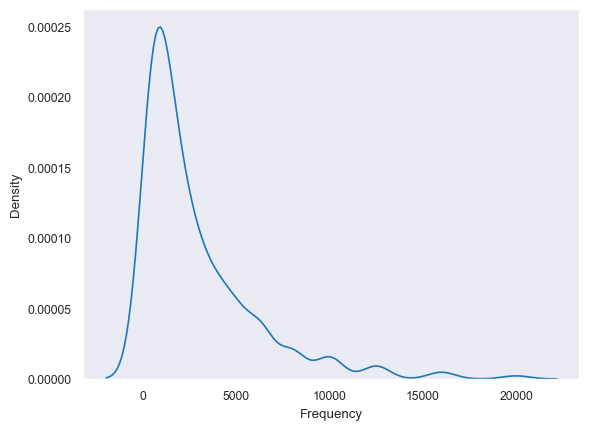

In [13]:
sns.kdeplot(df['Frequency'], )

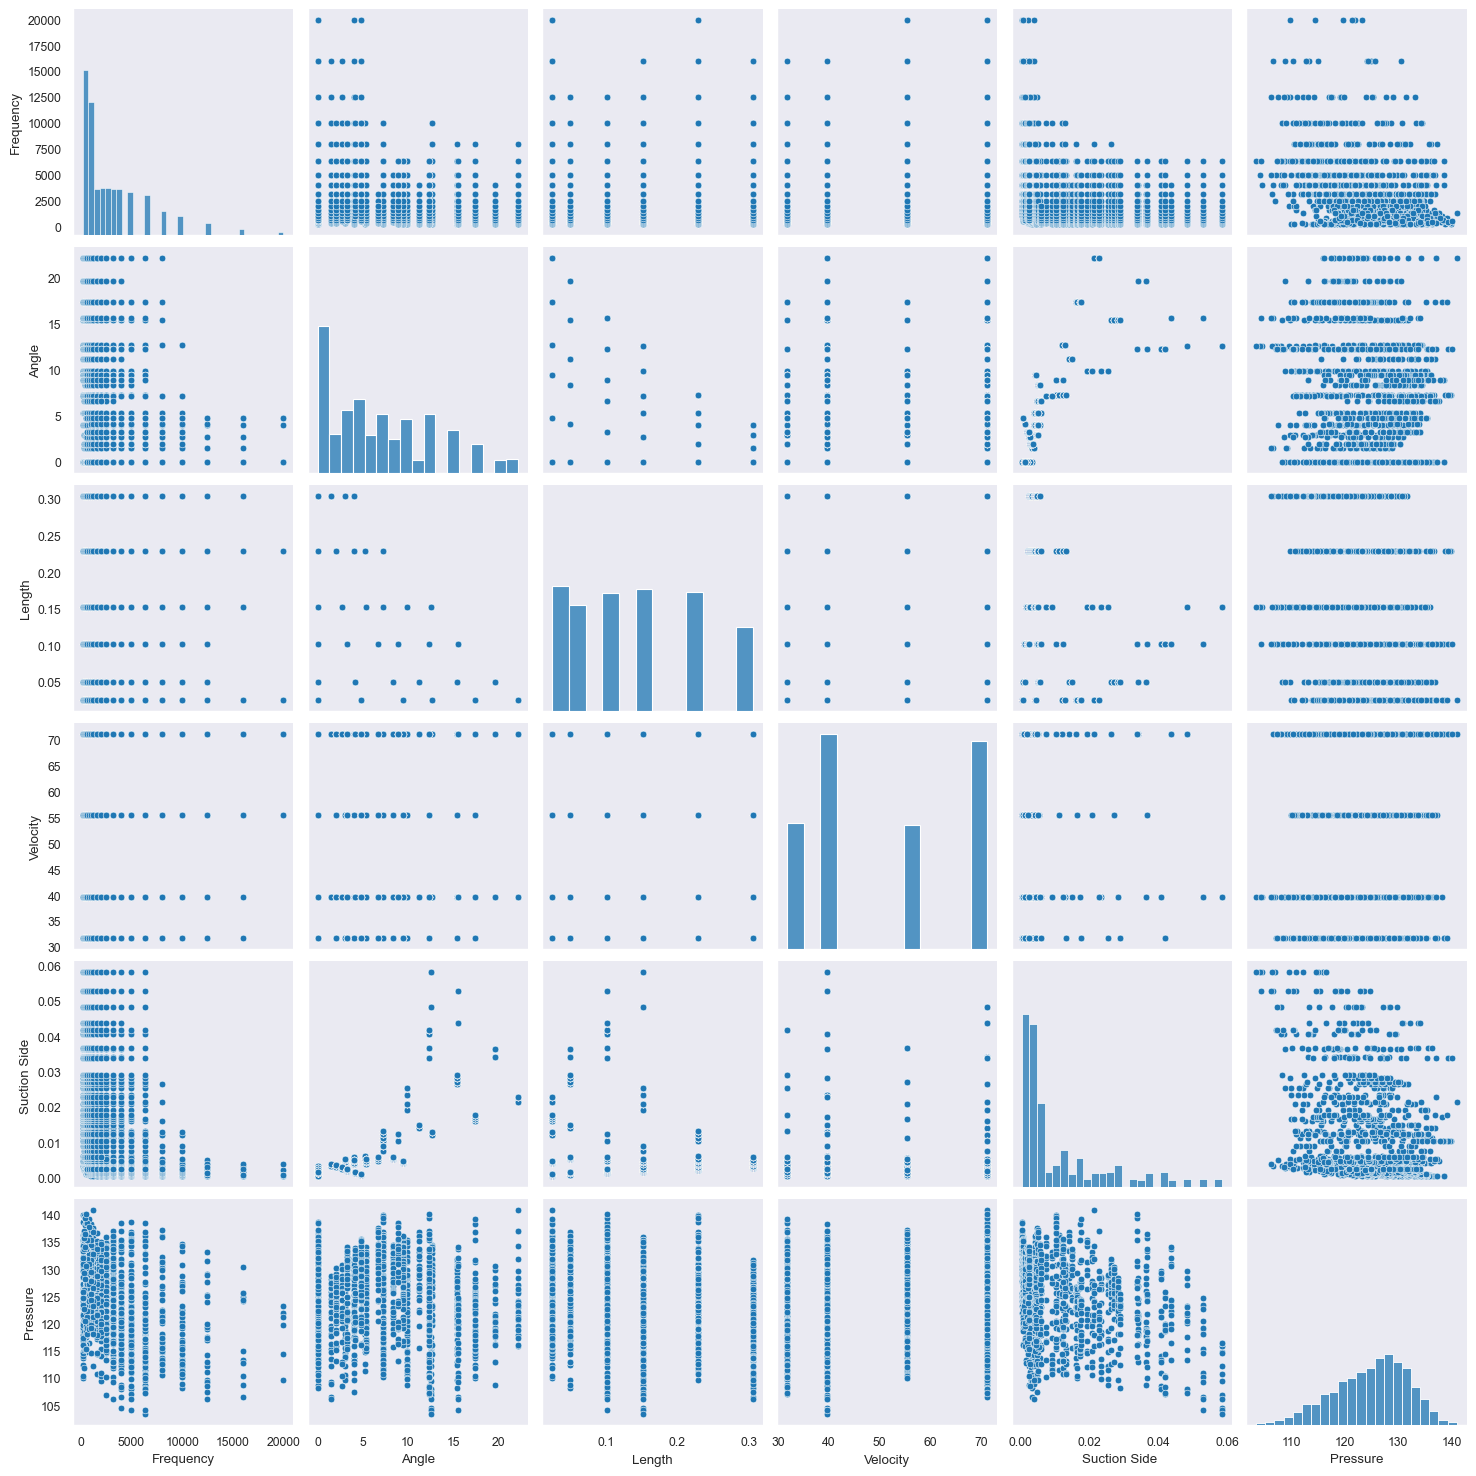

In [14]:
sns.pairplot(df,)# mostra todos os pares de vaariáveis e os histogramas 

In [15]:
#boxplot https://www.youtube.com/watch?v=6GUZXDef2U0

<AxesSubplot:xlabel='Frequency', ylabel='Pressure'>

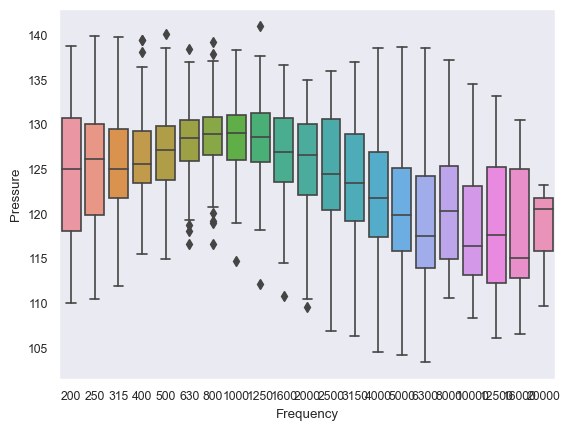

In [16]:
sns.boxplot(x='Frequency', y="Pressure", data=df)

Após a avaliação da distribuição dos dados para cada uma das variáveis, pode-se aplicar a normalização que é a mais apropriada do que a padronização uma vez que oas distribuições não seguem uma normalidade

In [17]:
from sklearn.preprocessing import MinMaxScaler 

In [18]:
df


,Frequency,Angle,Length,Velocity,Suction Side,Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
df_n = scaler.fit_transform(df)
print(df_n)

[[0.03030303 0.         1.         1.         0.03900472 0.60682852]
 [0.04040404 0.         1.         1.         0.03900472 0.58023772]
 [0.0530303  0.         1.         1.         0.03900472 0.60018082]
 ...
 [0.19191919 0.7027027  0.27272727 0.19949495 0.90411066 0.08572872]
 [0.24242424 0.7027027  0.27272727 0.19949495 0.90411066 0.07562422]
 [0.30808081 0.7027027  0.27272727 0.19949495 0.90411066 0.02191081]]


In [20]:
df_n=pd.DataFrame(df_n)

In [21]:
df_n

,0,1,2,3,4,5
0,0.030303,0.000000,1.000000,1.000000,0.039005,0.606829
1,0.040404,0.000000,1.000000,1.000000,0.039005,0.580238
2,0.053030,0.000000,1.000000,1.000000,0.039005,0.600181
3,0.070707,0.000000,1.000000,1.000000,0.039005,0.643790
4,0.090909,0.000000,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...,...
1498,0.116162,0.702703,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.702703,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.702703,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.702703,0.272727,0.199495,0.904111,0.075624


In [22]:
y=df_n[5]

In [23]:
X=df_n[df_n.columns[0:5]]

In [24]:
X

,0,1,2,3,4
0,0.030303,0.000000,1.000000,1.000000,0.039005
1,0.040404,0.000000,1.000000,1.000000,0.039005
2,0.053030,0.000000,1.000000,1.000000,0.039005
3,0.070707,0.000000,1.000000,1.000000,0.039005
4,0.090909,0.000000,1.000000,1.000000,0.039005
...,...,...,...,...,...
1498,0.116162,0.702703,0.272727,0.199495,0.904111
1499,0.148990,0.702703,0.272727,0.199495,0.904111
1500,0.191919,0.702703,0.272727,0.199495,0.904111
1501,0.242424,0.702703,0.272727,0.199495,0.904111


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

In [26]:
X_test

,0,1,2,3,4
1154,0.040404,0.783784,0.000000,1.000000,0.270697
475,0.116162,0.000000,0.454545,0.601010,0.022858
458,0.090909,0.000000,0.454545,1.000000,0.020653
43,0.242424,0.000000,1.000000,0.199495,0.046555
533,0.116162,0.121622,0.454545,0.199495,0.043912
1366,0.070707,0.301802,0.272727,0.199495,0.092743
537,0.308081,0.121622,0.454545,0.199495,0.043912
273,0.015152,0.090090,0.727273,0.199495,0.052836
428,0.030303,0.328829,0.727273,0.199495,0.205952
381,0.040404,0.238739,0.727273,0.199495,0.098992


In [27]:
y_train

1134    0.677720
600     0.868003
1201    0.953174
1010    0.838886
829     0.414152
          ...   
1427    0.858723
88      0.497806
892     0.719281
1334    0.787938
727     0.669556
Name: 5, Length: 1472, dtype: float64

In [28]:
y_test

1154    0.596591
475     0.648363
458     0.671870
43      0.383147
533     0.590555
1366    0.638046
537     0.420906
273     0.579068
428     0.609434
381     0.590342
895     0.659984
1085    0.545484
1101    0.625043
1065    0.820486
366     0.720079
803     0.820220
1084    0.472625
403     0.420879
282     0.447975
1210    0.331773
1450    0.385434
1493    0.414391
370     0.450714
1436    0.363603
385     0.339591
1125    0.755923
1073    0.766400
1465    0.409153
97      0.643072
1219    0.604063
355     0.447496
Name: 5, dtype: float64

In [29]:
#importando bibliotecas para construção da rede neural 

In [30]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [31]:
#construimos a rede neural

In [32]:
n_input = 5  # numero de entradas das rede neural 
num_out = 1
p_dropout = 0.5 # probabilidade dropout 

lbd = 1e-4  # L2- força de regularização 

model = Sequential()
model.add(Dropout(.05, input_shape=(n_input,)))
model.add(Dense(100, activation='relu', input_shape=(n_input,), kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(lbd)))
model.add(Dropout(p_dropout))
model.add(Dense(num_out, activation=None))
model.summary()

opt = Adam(lr=1e-3) 

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 100)               600       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-traina

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
#treinamos nossa rede por 15000 interações . Cada mini-lote terá 1/5das amostras e assim treinaremos por
# 3000 épocas ou 15000 iterações.

In [34]:
epochs = 10000
model.fit(X_train, y_train,
            batch_size=X_train.shape[0] // 1,
            epochs=epochs,
            verbose=0)

In [35]:
#Avaliamos a performance do modelo )

In [36]:
from sklearn import metrics

y_hat_train = model.predict(X_train)


46/46 [==============================] - 0s 640us/step


In [37]:
y_hat_test = model.predict(X_test)


1/1 [==============================] - 0s 41ms/step


In [38]:
# métricas do treino

In [39]:
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)

In [40]:
MAE_T,R2_T,RMSE_T

(0.04876342679621228, 0.8721054843220593, 0.004336353929476571)

In [41]:
# métricas do teste

In [42]:
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)

In [43]:
MAE_t,R2_t,RMSE_t

(0.04644562177880837, 0.8506805994888532, 0.003011318454901812)

In [44]:
#desnormalizando o MAE

In [45]:

MAE=0.0428467*37.607

In [46]:
MAE

1.6113358469

In [47]:
df_n.describe()

,0,1,2,3,4,5
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,0.135676,0.305509,0.397810,0.483857,0.185125,0.570531
std,0.159221,0.266582,0.334791,0.393252,0.226687,0.183441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030303,0.090090,0.090909,0.199495,0.036794,0.447018
50%,0.070707,0.243243,0.272727,0.199495,0.078550,0.594065
75%,0.191919,0.445946,0.727273,1.000000,0.261594,0.707727
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# elaboração do gráfico ordenando os dados em ordem e plotando os valores reais e predito no conjunto de teste 

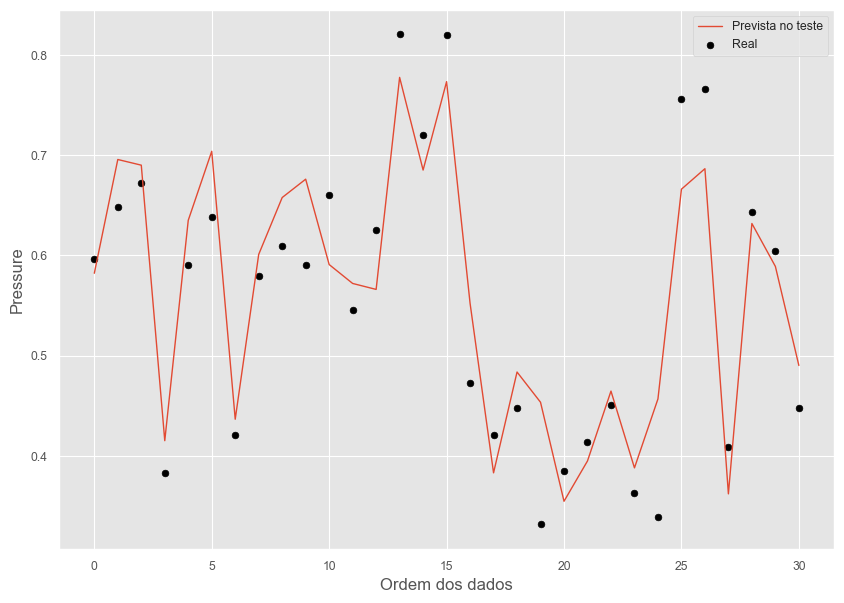

In [49]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

Acima, a previsão é feita da forma tradicional, isto é, colocando a probabilidade de Dropout em 0%, usando assim toda a capacidade da rede. Esse é o padrão do Keras e precisaremos rescrevê-lo para implementar Monte-Carlo Dropout, no qual mantemos as probabilidades de Dropout de treino também durante as previsões. Abaixo, vamos definir uma função que retornará a última camada da rede, (as previsões) dada a camada de entrada (as variáveis). Além disso, vamos definir que está função será usada tal como durante o treinamento, passando K.learning_phase().
Abaixo realizamos 1000 forwad-passes pela rede neural e obtemos 1000 previsões para cada ponto.

In [50]:
import tensorflow as tf
import numpy as np
from keras import backend as K

T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_test]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_test.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [51]:
y_hat_mc.shape

(31, 1000)

In [52]:
# para cada amostra, foram calculados 1000 resultados com base no Dropout . Vamos ver o dataframe :

In [53]:
yhat=pd.DataFrame(y_hat_mc)

In [54]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.621154,0.652410,0.553840,0.647201,0.577613,0.566656,0.527959,0.584945,0.557694,0.629094,...,0.593200,0.669915,0.538718,0.597310,0.508274,0.715125,0.553594,0.658078,0.633444,0.716529
1,0.737343,0.662356,0.621329,0.728089,0.706636,0.662890,0.707885,0.697665,0.671797,0.696674,...,0.749246,0.723445,0.709740,0.639017,0.606541,0.692146,0.647359,0.680785,0.680782,0.600995
2,0.704961,0.703843,0.753207,0.672686,0.739990,0.691043,0.671329,0.774510,0.662670,0.678318,...,0.729515,0.657363,0.672576,0.674842,0.734039,0.781889,0.655884,0.682393,0.675384,0.719542
3,0.456532,0.350422,0.381686,0.348637,0.585862,0.636289,0.447693,0.377018,0.441431,0.387116,...,0.328709,0.356314,0.426881,0.416475,0.557185,0.434988,0.386502,0.443096,0.427471,0.408902
4,0.695287,0.580354,0.676417,0.737305,0.600031,0.563510,0.626067,0.605786,0.666110,0.616618,...,0.631821,0.615059,0.627545,0.573929,0.564880,0.612922,0.661137,0.801261,0.668284,0.546426
5,0.689596,0.771087,0.650768,0.703894,0.723014,0.716769,0.700846,0.772972,0.631785,0.646850,...,0.634551,0.661402,0.695901,0.676245,0.715289,0.735047,0.752676,0.693504,0.665521,0.689522
6,0.477920,0.635011,0.411145,0.637680,0.438552,0.375166,0.491993,0.412674,0.352140,0.343226,...,0.418033,0.401366,0.387130,0.416457,0.430062,0.438681,0.402377,0.376347,0.426738,0.404074
7,0.631478,0.635975,0.621683,0.660396,0.609237,0.570061,0.530294,0.621303,0.566921,0.641161,...,0.645457,0.632273,0.627467,0.632070,0.703173,0.550611,0.628816,0.641518,0.653721,0.619344
8,0.626067,0.626263,0.649780,0.552587,0.667336,0.644057,0.719682,0.576052,0.683958,0.619498,...,0.634358,0.662603,0.748180,0.542579,0.689892,0.657092,0.640168,0.531399,0.622229,0.685302
9,0.633563,0.604071,0.644266,0.633498,0.635597,0.654478,0.653473,0.676579,0.671200,0.640906,...,0.686718,0.674560,0.637202,0.589790,0.633411,0.646968,0.658268,0.585646,0.632620,0.681306


In [55]:
#vamos calcular a média dos 1000 resultados para cada amostra de teste

In [56]:
yhat['mean']=yhat.apply(np.mean,axis=1)

In [57]:
yhat

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,mean
0,0.621154,0.652410,0.553840,0.647201,0.577613,0.566656,0.527959,0.584945,0.557694,0.629094,...,0.669915,0.538718,0.597310,0.508274,0.715125,0.553594,0.658078,0.633444,0.716529,0.582993
1,0.737343,0.662356,0.621329,0.728089,0.706636,0.662890,0.707885,0.697665,0.671797,0.696674,...,0.723445,0.709740,0.639017,0.606541,0.692146,0.647359,0.680785,0.680782,0.600995,0.674219
2,0.704961,0.703843,0.753207,0.672686,0.739990,0.691043,0.671329,0.774510,0.662670,0.678318,...,0.657363,0.672576,0.674842,0.734039,0.781889,0.655884,0.682393,0.675384,0.719542,0.687328
3,0.456532,0.350422,0.381686,0.348637,0.585862,0.636289,0.447693,0.377018,0.441431,0.387116,...,0.356314,0.426881,0.416475,0.557185,0.434988,0.386502,0.443096,0.427471,0.408902,0.421091
4,0.695287,0.580354,0.676417,0.737305,0.600031,0.563510,0.626067,0.605786,0.666110,0.616618,...,0.615059,0.627545,0.573929,0.564880,0.612922,0.661137,0.801261,0.668284,0.546426,0.620183
5,0.689596,0.771087,0.650768,0.703894,0.723014,0.716769,0.700846,0.772972,0.631785,0.646850,...,0.661402,0.695901,0.676245,0.715289,0.735047,0.752676,0.693504,0.665521,0.689522,0.680075
6,0.477920,0.635011,0.411145,0.637680,0.438552,0.375166,0.491993,0.412674,0.352140,0.343226,...,0.401366,0.387130,0.416457,0.430062,0.438681,0.402377,0.376347,0.426738,0.404074,0.430375
7,0.631478,0.635975,0.621683,0.660396,0.609237,0.570061,0.530294,0.621303,0.566921,0.641161,...,0.632273,0.627467,0.632070,0.703173,0.550611,0.628816,0.641518,0.653721,0.619344,0.607719
8,0.626067,0.626263,0.649780,0.552587,0.667336,0.644057,0.719682,0.576052,0.683958,0.619498,...,0.662603,0.748180,0.542579,0.689892,0.657092,0.640168,0.531399,0.622229,0.685302,0.630682
9,0.633563,0.604071,0.644266,0.633498,0.635597,0.654478,0.653473,0.676579,0.671200,0.640906,...,0.674560,0.637202,0.589790,0.633411,0.646968,0.658268,0.585646,0.632620,0.681306,0.650964


In [58]:
#separamos novamente os 1000 resultados retitrando a coluna média 

In [59]:
yhatd=yhat.iloc[:,0:1000]

In [60]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.621154,0.652410,0.553840,0.647201,0.577613,0.566656,0.527959,0.584945,0.557694,0.629094,...,0.593200,0.669915,0.538718,0.597310,0.508274,0.715125,0.553594,0.658078,0.633444,0.716529
1,0.737343,0.662356,0.621329,0.728089,0.706636,0.662890,0.707885,0.697665,0.671797,0.696674,...,0.749246,0.723445,0.709740,0.639017,0.606541,0.692146,0.647359,0.680785,0.680782,0.600995
2,0.704961,0.703843,0.753207,0.672686,0.739990,0.691043,0.671329,0.774510,0.662670,0.678318,...,0.729515,0.657363,0.672576,0.674842,0.734039,0.781889,0.655884,0.682393,0.675384,0.719542
3,0.456532,0.350422,0.381686,0.348637,0.585862,0.636289,0.447693,0.377018,0.441431,0.387116,...,0.328709,0.356314,0.426881,0.416475,0.557185,0.434988,0.386502,0.443096,0.427471,0.408902
4,0.695287,0.580354,0.676417,0.737305,0.600031,0.563510,0.626067,0.605786,0.666110,0.616618,...,0.631821,0.615059,0.627545,0.573929,0.564880,0.612922,0.661137,0.801261,0.668284,0.546426
5,0.689596,0.771087,0.650768,0.703894,0.723014,0.716769,0.700846,0.772972,0.631785,0.646850,...,0.634551,0.661402,0.695901,0.676245,0.715289,0.735047,0.752676,0.693504,0.665521,0.689522
6,0.477920,0.635011,0.411145,0.637680,0.438552,0.375166,0.491993,0.412674,0.352140,0.343226,...,0.418033,0.401366,0.387130,0.416457,0.430062,0.438681,0.402377,0.376347,0.426738,0.404074
7,0.631478,0.635975,0.621683,0.660396,0.609237,0.570061,0.530294,0.621303,0.566921,0.641161,...,0.645457,0.632273,0.627467,0.632070,0.703173,0.550611,0.628816,0.641518,0.653721,0.619344
8,0.626067,0.626263,0.649780,0.552587,0.667336,0.644057,0.719682,0.576052,0.683958,0.619498,...,0.634358,0.662603,0.748180,0.542579,0.689892,0.657092,0.640168,0.531399,0.622229,0.685302
9,0.633563,0.604071,0.644266,0.633498,0.635597,0.654478,0.653473,0.676579,0.671200,0.640906,...,0.686718,0.674560,0.637202,0.589790,0.633411,0.646968,0.658268,0.585646,0.632620,0.681306


In [61]:
#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste

In [62]:
yhatd['2*std']=yhatd.apply(np.std,axis=1)

In [63]:
yhatd

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,2*std
0,0.621154,0.652410,0.553840,0.647201,0.577613,0.566656,0.527959,0.584945,0.557694,0.629094,...,0.669915,0.538718,0.597310,0.508274,0.715125,0.553594,0.658078,0.633444,0.716529,0.069603
1,0.737343,0.662356,0.621329,0.728089,0.706636,0.662890,0.707885,0.697665,0.671797,0.696674,...,0.723445,0.709740,0.639017,0.606541,0.692146,0.647359,0.680785,0.680782,0.600995,0.044419
2,0.704961,0.703843,0.753207,0.672686,0.739990,0.691043,0.671329,0.774510,0.662670,0.678318,...,0.657363,0.672576,0.674842,0.734039,0.781889,0.655884,0.682393,0.675384,0.719542,0.037429
3,0.456532,0.350422,0.381686,0.348637,0.585862,0.636289,0.447693,0.377018,0.441431,0.387116,...,0.356314,0.426881,0.416475,0.557185,0.434988,0.386502,0.443096,0.427471,0.408902,0.071341
4,0.695287,0.580354,0.676417,0.737305,0.600031,0.563510,0.626067,0.605786,0.666110,0.616618,...,0.615059,0.627545,0.573929,0.564880,0.612922,0.661137,0.801261,0.668284,0.546426,0.049327
5,0.689596,0.771087,0.650768,0.703894,0.723014,0.716769,0.700846,0.772972,0.631785,0.646850,...,0.661402,0.695901,0.676245,0.715289,0.735047,0.752676,0.693504,0.665521,0.689522,0.054974
6,0.477920,0.635011,0.411145,0.637680,0.438552,0.375166,0.491993,0.412674,0.352140,0.343226,...,0.401366,0.387130,0.416457,0.430062,0.438681,0.402377,0.376347,0.426738,0.404074,0.070014
7,0.631478,0.635975,0.621683,0.660396,0.609237,0.570061,0.530294,0.621303,0.566921,0.641161,...,0.632273,0.627467,0.632070,0.703173,0.550611,0.628816,0.641518,0.653721,0.619344,0.041301
8,0.626067,0.626263,0.649780,0.552587,0.667336,0.644057,0.719682,0.576052,0.683958,0.619498,...,0.662603,0.748180,0.542579,0.689892,0.657092,0.640168,0.531399,0.622229,0.685302,0.048000
9,0.633563,0.604071,0.644266,0.633498,0.635597,0.654478,0.653473,0.676579,0.671200,0.640906,...,0.674560,0.637202,0.589790,0.633411,0.646968,0.658268,0.585646,0.632620,0.681306,0.039514


In [64]:
#Abaixo os valores reais para y do conjunto de teste

In [65]:
y_test=pd.DataFrame(y_test)

In [66]:
y_test

,5
1154,0.596591
475,0.648363
458,0.671870
43,0.383147
533,0.590555
1366,0.638046
537,0.420906
273,0.579068
428,0.609434
381,0.590342


In [67]:
#resetando o índice 

In [68]:
y_test=y_test.reset_index(drop=True)

In [69]:
y_test

,5
0,0.596591
1,0.648363
2,0.671870
3,0.383147
4,0.590555
5,0.638046
6,0.420906
7,0.579068
8,0.609434
9,0.590342


In [70]:
#retirado a coluna 0

In [71]:
mean=yhat.iloc[:,1000]

In [72]:
mean=pd.DataFrame(mean)

In [73]:
mean

,mean
0,0.582993
1,0.674219
2,0.687328
3,0.421091
4,0.620183
5,0.680075
6,0.430375
7,0.607719
8,0.630682
9,0.650964


In [74]:
desvpad=yhatd.iloc[:,1000]

In [75]:
desvpad=2*pd.DataFrame(desvpad)

In [76]:
desvpad

,2*std
0,0.139206
1,0.088837
2,0.074857
3,0.142682
4,0.098654
5,0.109948
6,0.140029
7,0.082602
8,0.096000
9,0.079028


In [77]:
#colocar tudo em uma tabela

In [78]:
df.resume=pd.concat([y_test,mean,desvpad],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_23504\1750862409.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume=pd.concat([y_test,mean,desvpad],axis=1)


In [79]:
df.resume

,5,mean,2*std
0,0.596591,0.582993,0.139206
1,0.648363,0.674219,0.088837
2,0.671870,0.687328,0.074857
3,0.383147,0.421091,0.142682
4,0.590555,0.620183,0.098654
5,0.638046,0.680075,0.109948
6,0.420906,0.430375,0.140029
7,0.579068,0.607719,0.082602
8,0.609434,0.630682,0.096000
9,0.590342,0.650964,0.079028


In [80]:
df.resume['Ulow']=df.resume['mean']-df.resume['2*std']

In [81]:
df.resume['Uup']=df.resume['mean'] + df.resume['2*std']

In [82]:
df.resume

,5,mean,2*std,Ulow,Uup
0,0.596591,0.582993,0.139206,0.443787,0.722199
1,0.648363,0.674219,0.088837,0.585382,0.763056
2,0.671870,0.687328,0.074857,0.612471,0.762185
3,0.383147,0.421091,0.142682,0.278408,0.563773
4,0.590555,0.620183,0.098654,0.521529,0.718837
5,0.638046,0.680075,0.109948,0.570128,0.790023
6,0.420906,0.430375,0.140029,0.290347,0.570404
7,0.579068,0.607719,0.082602,0.525117,0.690321
8,0.609434,0.630682,0.096000,0.534682,0.726681
9,0.590342,0.650964,0.079028,0.571936,0.729991


In [83]:
    df.resume.rename(columns={'Pressure ':'y_real'},inplace=True)  

In [84]:
df.resume

,5,mean,2*std,Ulow,Uup
0,0.596591,0.582993,0.139206,0.443787,0.722199
1,0.648363,0.674219,0.088837,0.585382,0.763056
2,0.671870,0.687328,0.074857,0.612471,0.762185
3,0.383147,0.421091,0.142682,0.278408,0.563773
4,0.590555,0.620183,0.098654,0.521529,0.718837
5,0.638046,0.680075,0.109948,0.570128,0.790023
6,0.420906,0.430375,0.140029,0.290347,0.570404
7,0.579068,0.607719,0.082602,0.525117,0.690321
8,0.609434,0.630682,0.096000,0.534682,0.726681
9,0.590342,0.650964,0.079028,0.571936,0.729991


In [85]:
df.resume['erro']=abs(df.resume[5]-df.resume['mean'])

In [86]:
df.resume

,5,mean,2*std,Ulow,Uup,erro
0,0.596591,0.582993,0.139206,0.443787,0.722199,0.013598
1,0.648363,0.674219,0.088837,0.585382,0.763056,0.025856
2,0.671870,0.687328,0.074857,0.612471,0.762185,0.015458
3,0.383147,0.421091,0.142682,0.278408,0.563773,0.037944
4,0.590555,0.620183,0.098654,0.521529,0.718837,0.029628
5,0.638046,0.680075,0.109948,0.570128,0.790023,0.042029
6,0.420906,0.430375,0.140029,0.290347,0.570404,0.009470
7,0.579068,0.607719,0.082602,0.525117,0.690321,0.028651
8,0.609434,0.630682,0.096000,0.534682,0.726681,0.021247
9,0.590342,0.650964,0.079028,0.571936,0.729991,0.060621


In [188]:
df.resume.to_csv('df.resume.csv')

In [88]:
#verificar um valor predito : média e desvio padrão 

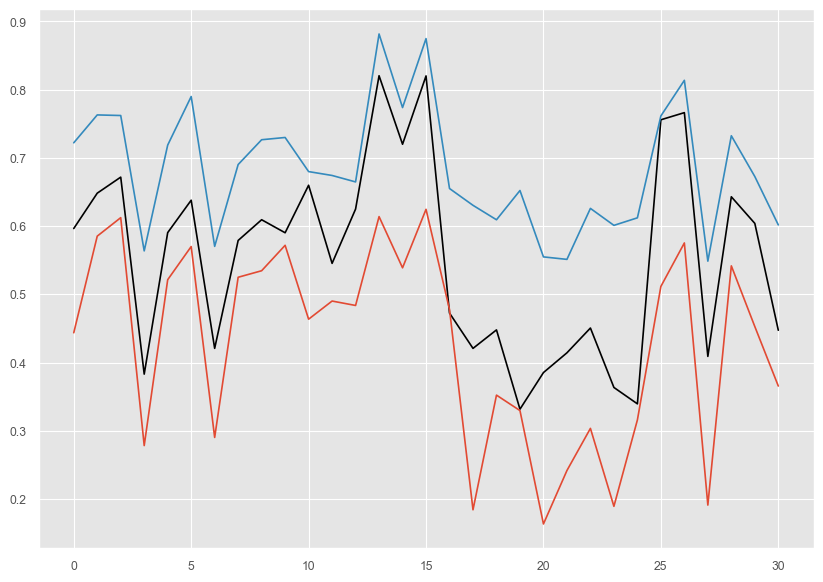

In [89]:
plt.style.use("ggplot")
plt.figure(figsize=(10,7))
plt.plot(df.resume[5],color='black')
plt.plot(df.resume['Ulow'])
plt.plot(df.resume['Uup'])






plt.show()

In [90]:
yt=np.array(y_test)

In [91]:
yt[0]

array([0.59659106])

In [92]:
np.mean(y_hat_mc[0])

0.58299345

In [93]:
np.sqrt(np.var(y_hat_mc[0]))

0.06960301

In [94]:
#Computamos média e variância para cada ponto no set de teste.

In [95]:
l = 10
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 

In [96]:
metrics.mean_absolute_error(y_test, y_hat_test_mean)

0.04820758987618751

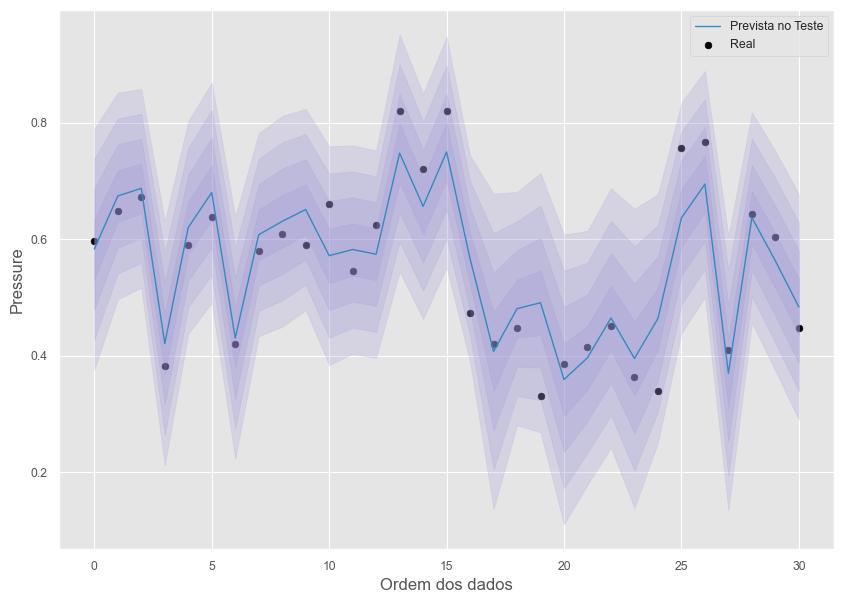

In [97]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [98]:
T = 1000

tf.keras.backend.set_learning_phase(1)

predict_stochastic = K.function([model.layers[0].input], [model.layers[-1].output])

y_hat_mc = np.array([predict_stochastic([X_train]) for _ in range(T)])

y_hat_mc = y_hat_mc.reshape(-1, y_train.shape[0]).T

C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [99]:
l = 10
y_hat_train_mean = np.mean(y_hat_mc, axis=1)
y_hat_train_variance = np.var(y_hat_mc, axis=1)
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_train_variance += tau**-1

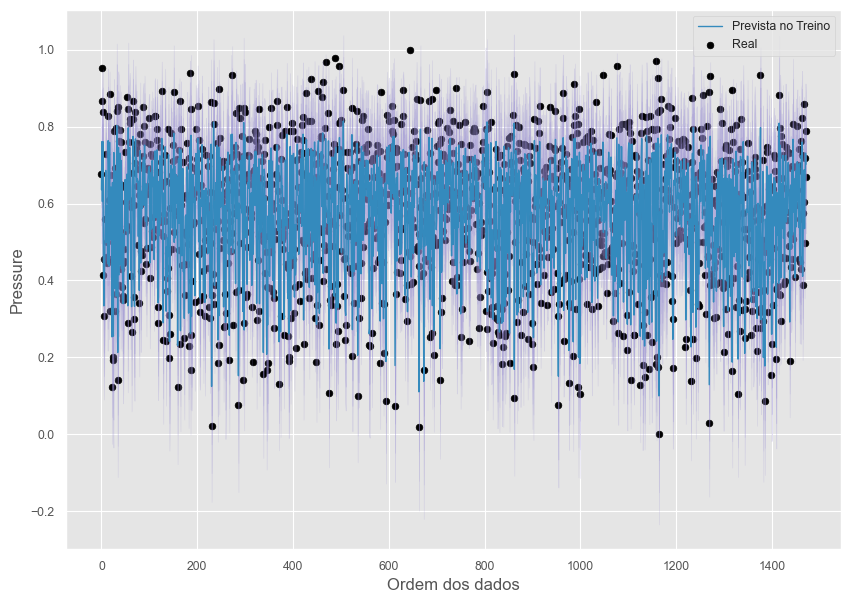

In [100]:
n = 1472
t = range(n) 
mu = y_hat_train_mean
sigma = np.sqrt(y_hat_train_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Treino", color="C1", lw=1)
plt.scatter(t, y_train, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2") # 90% IC

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_train.png")
plt.show()

Determinação do erro sistemático e aleatório sobre todos os valores do DataFrame

In [101]:
X_test=X_test.reset_index(drop=True)

In [102]:
X_test

,0,1,2,3,4
0,0.040404,0.783784,0.000000,1.000000,0.270697
1,0.116162,0.000000,0.454545,0.601010,0.022858
2,0.090909,0.000000,0.454545,1.000000,0.020653
3,0.242424,0.000000,1.000000,0.199495,0.046555
4,0.116162,0.121622,0.454545,0.199495,0.043912
5,0.070707,0.301802,0.272727,0.199495,0.092743
6,0.308081,0.121622,0.454545,0.199495,0.043912
7,0.015152,0.090090,0.727273,0.199495,0.052836
8,0.030303,0.328829,0.727273,0.199495,0.205952
9,0.040404,0.238739,0.727273,0.199495,0.098992


In [103]:

 previsão=model.predict(X_test[:31])


1/1 [==============================] - 0s 15ms/step


In [104]:
colnames=["Predict"]

In [105]:
previsão1=pd.DataFrame(previsão, columns=colnames)

In [106]:
previsão1

,Predict
0,0.582262
1,0.695731
2,0.690076
3,0.415288
4,0.635091
5,0.703930
6,0.436681
7,0.601070
8,0.657796
9,0.676099


In [107]:
df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_23504\3988421289.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)


In [108]:
df.resume3

,0,1,2,3,4,5,Predict
0,0.040404,0.783784,0.000000,1.000000,0.270697,0.596591,0.582262
1,0.116162,0.000000,0.454545,0.601010,0.022858,0.648363,0.695731
2,0.090909,0.000000,0.454545,1.000000,0.020653,0.671870,0.690076
3,0.242424,0.000000,1.000000,0.199495,0.046555,0.383147,0.415288
4,0.116162,0.121622,0.454545,0.199495,0.043912,0.590555,0.635091
5,0.070707,0.301802,0.272727,0.199495,0.092743,0.638046,0.703930
6,0.308081,0.121622,0.454545,0.199495,0.043912,0.420906,0.436681
7,0.015152,0.090090,0.727273,0.199495,0.052836,0.579068,0.601070
8,0.030303,0.328829,0.727273,0.199495,0.205952,0.609434,0.657796
9,0.040404,0.238739,0.727273,0.199495,0.098992,0.590342,0.676099


In [109]:
#criar a coluna de predict delta x1 

In [110]:
#incerteza de x1 (medidor de frequência)

In [111]:
ux1=0.000001
ux2=0.000001
ux3=0.000001
ux4=0.000001
ux5=0.000001

In [112]:
deltax1=X_test[:31]+np.array([ux1,0,0,0,0])

In [113]:
deltax1

,0,1,2,3,4
0,0.040405,0.783784,0.000000,1.000000,0.270697
1,0.116163,0.000000,0.454545,0.601010,0.022858
2,0.090910,0.000000,0.454545,1.000000,0.020653
3,0.242425,0.000000,1.000000,0.199495,0.046555
4,0.116163,0.121622,0.454545,0.199495,0.043912
5,0.070708,0.301802,0.272727,0.199495,0.092743
6,0.308082,0.121622,0.454545,0.199495,0.043912
7,0.015153,0.090090,0.727273,0.199495,0.052836
8,0.030304,0.328829,0.727273,0.199495,0.205952
9,0.040405,0.238739,0.727273,0.199495,0.098992


In [114]:
previsãodeltax1=model.predict(deltax1[:31])


1/1 [==============================] - 0s 14ms/step


In [115]:
colnames=["Predict Deltax1"]
previsãodeltax1=pd.DataFrame(previsãodeltax1, columns=colnames)

In [116]:
#criar a coluna de predict delta x2

In [117]:
#incerteza de x2 (medidor de ângulo)

In [118]:
deltax2=X_test[:31]+np.array([0,ux2,0,0,0])

In [119]:
deltax2

,0,1,2,3,4
0,0.040404,0.783785,0.000000,1.000000,0.270697
1,0.116162,0.000001,0.454545,0.601010,0.022858
2,0.090909,0.000001,0.454545,1.000000,0.020653
3,0.242424,0.000001,1.000000,0.199495,0.046555
4,0.116162,0.121623,0.454545,0.199495,0.043912
5,0.070707,0.301803,0.272727,0.199495,0.092743
6,0.308081,0.121623,0.454545,0.199495,0.043912
7,0.015152,0.090091,0.727273,0.199495,0.052836
8,0.030303,0.328830,0.727273,0.199495,0.205952
9,0.040404,0.238740,0.727273,0.199495,0.098992


In [120]:
previsãodeltax2=model.predict(deltax2[:31])

1/1 [==============================] - 0s 15ms/step


In [121]:
colnames=["Predict Deltax2"]
previsãodeltax2=pd.DataFrame(previsãodeltax2, columns=colnames)

In [122]:
#criar a coluna de predict delta x3

In [123]:
#incerteza de x3 (medidor de comprimento)

In [124]:
deltax3=X_test[:31]+np.array([0,0,ux3,0,0])

In [125]:
deltax3

,0,1,2,3,4
0,0.040404,0.783784,0.000001,1.000000,0.270697
1,0.116162,0.000000,0.454546,0.601010,0.022858
2,0.090909,0.000000,0.454546,1.000000,0.020653
3,0.242424,0.000000,1.000001,0.199495,0.046555
4,0.116162,0.121622,0.454546,0.199495,0.043912
5,0.070707,0.301802,0.272728,0.199495,0.092743
6,0.308081,0.121622,0.454546,0.199495,0.043912
7,0.015152,0.090090,0.727274,0.199495,0.052836
8,0.030303,0.328829,0.727274,0.199495,0.205952
9,0.040404,0.238739,0.727274,0.199495,0.098992


In [126]:
previsãodeltax3=model.predict(deltax3[:31])

1/1 [==============================] - 0s 15ms/step


In [127]:
colnames=["Predict Deltax3"]
previsãodeltax3=pd.DataFrame(previsãodeltax3, columns=colnames)

In [128]:
#criar a coluna de predict delta x4

In [129]:
#incerteza de x4 (medidor de velocidade).

In [130]:
deltax4=X_test[:31]+np.array([0,0,0,ux4,0])

In [131]:
deltax4

,0,1,2,3,4
0,0.040404,0.783784,0.000000,1.000001,0.270697
1,0.116162,0.000000,0.454545,0.601011,0.022858
2,0.090909,0.000000,0.454545,1.000001,0.020653
3,0.242424,0.000000,1.000000,0.199496,0.046555
4,0.116162,0.121622,0.454545,0.199496,0.043912
5,0.070707,0.301802,0.272727,0.199496,0.092743
6,0.308081,0.121622,0.454545,0.199496,0.043912
7,0.015152,0.090090,0.727273,0.199496,0.052836
8,0.030303,0.328829,0.727273,0.199496,0.205952
9,0.040404,0.238739,0.727273,0.199496,0.098992


In [132]:
previsãodeltax4=model.predict(deltax4[:31])

1/1 [==============================] - 0s 17ms/step


In [133]:
colnames=["Predict Deltax4"]
previsãodeltax4=pd.DataFrame(previsãodeltax4, columns=colnames)

In [134]:
#criar a coluna de predict delta x5

In [135]:
#incerteza de x5 (medidor de sucção)

In [136]:
deltax5=X_test[:31]+np.array([0,0,0,0,ux5])

In [137]:
deltax5

,0,1,2,3,4
0,0.040404,0.783784,0.000000,1.000000,0.270698
1,0.116162,0.000000,0.454545,0.601010,0.022859
2,0.090909,0.000000,0.454545,1.000000,0.020654
3,0.242424,0.000000,1.000000,0.199495,0.046556
4,0.116162,0.121622,0.454545,0.199495,0.043913
5,0.070707,0.301802,0.272727,0.199495,0.092744
6,0.308081,0.121622,0.454545,0.199495,0.043913
7,0.015152,0.090090,0.727273,0.199495,0.052837
8,0.030303,0.328829,0.727273,0.199495,0.205953
9,0.040404,0.238739,0.727273,0.199495,0.098993


In [138]:
previsãodeltax5=model.predict(deltax5[:31])

1/1 [==============================] - 0s 14ms/step


In [139]:
colnames=["Predict Deltax5"]
previsãodeltax5=pd.DataFrame(previsãodeltax5, columns=colnames)

In [140]:
df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_23504\2651709830.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)


In [141]:
df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/ux1


In [142]:
df.total['c2']=(df.total['Predict Deltax2']-df.total['Predict'])/ux2


In [143]:
df.total['c3']=(df.total['Predict Deltax3']-df.total['Predict'])/ux3

In [144]:
df.total['c4']=(df.total['Predict Deltax4']-df.total['Predict'])/ux4

In [145]:
df.total['c5']=(df.total['Predict Deltax5']-df.total['Predict'])/ux5

In [146]:
#cálculo da incerteza combinada : incerteza expandida de x1 a x5  desvio padrão do erro sistemático
#x1: medidor de frequencia sonora.5% do valor médio da escala
#x2: medidor de angulo :5% do valor médio da escala
#x3: medidor de comprimento 5% do valor médio da escala
#x4: medidor de velocidade do vento Pesquisando a incerteza em tuneis de vento chega a 15% do resultado . Como a velocidade média é em torno de 40 m/s estimou-se em +-6m/s²
#x5: medidor de sucção 5% do valor médio da escala
#y: pressão somora: 5% do valor médio da escala
 

In [147]:
upx1=0.05*0.5/2
upx2=0.05*0.5/2
upx3=0.05*0.5/2
upx4=0.05*0.5/2
upx5=0.05*0.5/2
upy=0.05*0.5/2

In [148]:
df.total['uc']=2*((df.total['c1']*upx1)**2+(df.total['c2']*upx2)**2+(df.total['c3']*upx3)**2+(df.total['c4']*upx4)**2
                +(df.total['c5']*upx5)**2+(upy)**2)**0.5

In [149]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc
0,0.596591,0.582262,0.582265,0.582262,0.582263,0.582262,0.582262,3.039837,-0.536442,1.132488,0.000000,0.059605,0.085930
1,0.648363,0.695731,0.695731,0.695731,0.695731,0.695731,0.695731,-0.238419,0.119209,-0.178814,0.000000,0.178814,0.026634
2,0.671870,0.690076,0.690076,0.690076,0.690076,0.690076,0.690077,0.298023,0.178814,-0.178814,-0.059605,0.476837,0.029408
3,0.383147,0.415288,0.415287,0.415288,0.415288,0.415288,0.415288,-0.655651,-0.238419,-0.119209,0.119209,-0.536442,0.033568
4,0.590555,0.635091,0.635090,0.635091,0.635091,0.635091,0.635091,-1.251698,-0.178814,-0.476837,0.119209,-0.834465,0.047015
5,0.638046,0.703930,0.703926,0.703930,0.703930,0.703930,0.703929,-3.457069,-0.357628,-0.357628,0.119209,-1.013279,0.094367
6,0.420906,0.436681,0.436681,0.436681,0.436681,0.436681,0.436681,-0.774860,-0.417233,-0.208616,0.089407,-0.566244,0.036629
7,0.579068,0.601070,0.601076,0.601070,0.601070,0.601070,0.601071,5.960464,0.178814,0.059605,0.000000,0.834465,0.152600
8,0.609434,0.657796,0.657792,0.657795,0.657796,0.657796,0.657796,-4.172325,-0.596046,-0.357628,0.178814,-0.298023,0.109008
9,0.590342,0.676099,0.676096,0.676099,0.676099,0.676099,0.676099,-2.920628,-0.059605,-0.238419,0.119209,-0.417233,0.078177


In [150]:
df.total['prediction error']=(df.total['Predict']-df.total[5])

In [151]:
df.total


,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,prediction error
0,0.596591,0.582262,0.582265,0.582262,0.582263,0.582262,0.582262,3.039837,-0.536442,1.132488,0.000000,0.059605,0.085930,-0.014329
1,0.648363,0.695731,0.695731,0.695731,0.695731,0.695731,0.695731,-0.238419,0.119209,-0.178814,0.000000,0.178814,0.026634,0.047367
2,0.671870,0.690076,0.690076,0.690076,0.690076,0.690076,0.690077,0.298023,0.178814,-0.178814,-0.059605,0.476837,0.029408,0.018206
3,0.383147,0.415288,0.415287,0.415288,0.415288,0.415288,0.415288,-0.655651,-0.238419,-0.119209,0.119209,-0.536442,0.033568,0.032141
4,0.590555,0.635091,0.635090,0.635091,0.635091,0.635091,0.635091,-1.251698,-0.178814,-0.476837,0.119209,-0.834465,0.047015,0.044536
5,0.638046,0.703930,0.703926,0.703930,0.703930,0.703930,0.703929,-3.457069,-0.357628,-0.357628,0.119209,-1.013279,0.094367,0.065884
6,0.420906,0.436681,0.436681,0.436681,0.436681,0.436681,0.436681,-0.774860,-0.417233,-0.208616,0.089407,-0.566244,0.036629,0.015776
7,0.579068,0.601070,0.601076,0.601070,0.601070,0.601070,0.601071,5.960464,0.178814,0.059605,0.000000,0.834465,0.152600,0.022002
8,0.609434,0.657796,0.657792,0.657795,0.657796,0.657796,0.657796,-4.172325,-0.596046,-0.357628,0.178814,-0.298023,0.109008,0.048362
9,0.590342,0.676099,0.676096,0.676099,0.676099,0.676099,0.676099,-2.920628,-0.059605,-0.238419,0.119209,-0.417233,0.078177,0.085757


In [152]:
df.total['prediction error'].describe()

count    31.000000
mean      0.007927
std       0.055197
min      -0.089812
25%      -0.036265
50%       0.015776
75%       0.043679
max       0.121840
Name: prediction error, dtype: float64

In [153]:
es=df.total.loc[:,'prediction error'].mean()

In [154]:
es

0.007927197321391345

In [155]:
ea=df.total.loc[:,'prediction error'].std()

In [156]:
ea

0.05519746912175584

In [157]:
df.total['ucc']=2*((df.total['c1']*upx1)**2+(df.total['c2']*upx2)**2+(df.total['c3']*upx3)**2+(df.total['c4']*upx4)**2
                +(df.total['c5']*upx5)**2+(ea)**2)**0.5+abs(es)

In [158]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,prediction error,ucc
0,0.596591,0.582262,0.582265,0.582262,0.582263,0.582262,0.582262,3.039837,-0.536442,1.132488,0.000000,0.059605,0.085930,-0.014329,0.145572
1,0.648363,0.695731,0.695731,0.695731,0.695731,0.695731,0.695731,-0.238419,0.119209,-0.178814,0.000000,0.178814,0.026634,0.047367,0.118704
2,0.671870,0.690076,0.690076,0.690076,0.690076,0.690076,0.690077,0.298023,0.178814,-0.178814,-0.059605,0.476837,0.029408,0.018206,0.119403
3,0.383147,0.415288,0.415287,0.415288,0.415288,0.415288,0.415288,-0.655651,-0.238419,-0.119209,0.119209,-0.536442,0.033568,0.032141,0.120572
4,0.590555,0.635091,0.635090,0.635091,0.635091,0.635091,0.635091,-1.251698,-0.178814,-0.476837,0.119209,-0.834465,0.047015,0.044536,0.125283
5,0.638046,0.703930,0.703926,0.703930,0.703930,0.703930,0.703929,-3.457069,-0.357628,-0.357628,0.119209,-1.013279,0.094367,0.065884,0.150990
6,0.420906,0.436681,0.436681,0.436681,0.436681,0.436681,0.436681,-0.774860,-0.417233,-0.208616,0.089407,-0.566244,0.036629,0.015776,0.121522
7,0.579068,0.601070,0.601076,0.601070,0.601070,0.601070,0.601071,5.960464,0.178814,0.059605,0.000000,0.834465,0.152600,0.022002,0.194606
8,0.609434,0.657796,0.657792,0.657795,0.657796,0.657796,0.657796,-4.172325,-0.596046,-0.357628,0.178814,-0.298023,0.109008,0.048362,0.161044
9,0.590342,0.676099,0.676096,0.676099,0.676099,0.676099,0.676099,-2.920628,-0.059605,-0.238419,0.119209,-0.417233,0.078177,0.085757,0.140870


In [159]:
dfb=df.total.drop(['Predict Deltax1','Predict Deltax2','Predict Deltax3','Predict Deltax4','Predict Deltax5','uc'],axis=1)

In [160]:
dfb

,5,Predict,c1,c2,c3,c4,c5,prediction error,ucc
0,0.596591,0.582262,3.039837,-0.536442,1.132488,0.000000,0.059605,-0.014329,0.145572
1,0.648363,0.695731,-0.238419,0.119209,-0.178814,0.000000,0.178814,0.047367,0.118704
2,0.671870,0.690076,0.298023,0.178814,-0.178814,-0.059605,0.476837,0.018206,0.119403
3,0.383147,0.415288,-0.655651,-0.238419,-0.119209,0.119209,-0.536442,0.032141,0.120572
4,0.590555,0.635091,-1.251698,-0.178814,-0.476837,0.119209,-0.834465,0.044536,0.125283
5,0.638046,0.703930,-3.457069,-0.357628,-0.357628,0.119209,-1.013279,0.065884,0.150990
6,0.420906,0.436681,-0.774860,-0.417233,-0.208616,0.089407,-0.566244,0.015776,0.121522
7,0.579068,0.601070,5.960464,0.178814,0.059605,0.000000,0.834465,0.022002,0.194606
8,0.609434,0.657796,-4.172325,-0.596046,-0.357628,0.178814,-0.298023,0.048362,0.161044
9,0.590342,0.676099,-2.920628,-0.059605,-0.238419,0.119209,-0.417233,0.085757,0.140870


In [161]:
df.total['uccpercent']=(df.total['ucc']*100)/(df.total['Predict'])   

In [162]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,prediction error,ucc,uccpercent
0,0.596591,0.582262,0.582265,0.582262,0.582263,0.582262,0.582262,3.039837,-0.536442,1.132488,0.000000,0.059605,0.085930,-0.014329,0.145572,25.001095
1,0.648363,0.695731,0.695731,0.695731,0.695731,0.695731,0.695731,-0.238419,0.119209,-0.178814,0.000000,0.178814,0.026634,0.047367,0.118704,17.061718
2,0.671870,0.690076,0.690076,0.690076,0.690076,0.690076,0.690077,0.298023,0.178814,-0.178814,-0.059605,0.476837,0.029408,0.018206,0.119403,17.302872
3,0.383147,0.415288,0.415287,0.415288,0.415288,0.415288,0.415288,-0.655651,-0.238419,-0.119209,0.119209,-0.536442,0.033568,0.032141,0.120572,29.033350
4,0.590555,0.635091,0.635090,0.635091,0.635091,0.635091,0.635091,-1.251698,-0.178814,-0.476837,0.119209,-0.834465,0.047015,0.044536,0.125283,19.726807
5,0.638046,0.703930,0.703926,0.703930,0.703930,0.703930,0.703929,-3.457069,-0.357628,-0.357628,0.119209,-1.013279,0.094367,0.065884,0.150990,21.449636
6,0.420906,0.436681,0.436681,0.436681,0.436681,0.436681,0.436681,-0.774860,-0.417233,-0.208616,0.089407,-0.566244,0.036629,0.015776,0.121522,27.828440
7,0.579068,0.601070,0.601076,0.601070,0.601070,0.601070,0.601071,5.960464,0.178814,0.059605,0.000000,0.834465,0.152600,0.022002,0.194606,32.376564
8,0.609434,0.657796,0.657792,0.657795,0.657796,0.657796,0.657796,-4.172325,-0.596046,-0.357628,0.178814,-0.298023,0.109008,0.048362,0.161044,24.482334
9,0.590342,0.676099,0.676096,0.676099,0.676099,0.676099,0.676099,-2.920628,-0.059605,-0.238419,0.119209,-0.417233,0.078177,0.085757,0.140870,20.835684


In [163]:
dfb['contribuição x1']=df.total['c1']*upx1

In [164]:
dfb

,5,Predict,c1,c2,c3,c4,c5,prediction error,ucc,contribuição x1
0,0.596591,0.582262,3.039837,-0.536442,1.132488,0.000000,0.059605,-0.014329,0.145572,0.037998
1,0.648363,0.695731,-0.238419,0.119209,-0.178814,0.000000,0.178814,0.047367,0.118704,-0.002980
2,0.671870,0.690076,0.298023,0.178814,-0.178814,-0.059605,0.476837,0.018206,0.119403,0.003725
3,0.383147,0.415288,-0.655651,-0.238419,-0.119209,0.119209,-0.536442,0.032141,0.120572,-0.008196
4,0.590555,0.635091,-1.251698,-0.178814,-0.476837,0.119209,-0.834465,0.044536,0.125283,-0.015646
5,0.638046,0.703930,-3.457069,-0.357628,-0.357628,0.119209,-1.013279,0.065884,0.150990,-0.043213
6,0.420906,0.436681,-0.774860,-0.417233,-0.208616,0.089407,-0.566244,0.015776,0.121522,-0.009686
7,0.579068,0.601070,5.960464,0.178814,0.059605,0.000000,0.834465,0.022002,0.194606,0.074506
8,0.609434,0.657796,-4.172325,-0.596046,-0.357628,0.178814,-0.298023,0.048362,0.161044,-0.052154
9,0.590342,0.676099,-2.920628,-0.059605,-0.238419,0.119209,-0.417233,0.085757,0.140870,-0.036508


In [165]:
dfb['contribuição x2']=df.total['c2']*upx2

In [166]:
dfb['contribuição x3']=df.total['c3']*upx3

In [167]:
dfb['contribuição x4']=df.total['c4']*upx4

In [168]:
dfb['contribuição x5']=df.total['c5']*upx5

In [169]:
dfb

,5,Predict,c1,c2,c3,c4,c5,prediction error,ucc,contribuição x1,contribuição x2,contribuição x3,contribuição x4,contribuição x5
0,0.596591,0.582262,3.039837,-0.536442,1.132488,0.000000,0.059605,-0.014329,0.145572,0.037998,-0.006706,0.014156,0.000000,0.000745
1,0.648363,0.695731,-0.238419,0.119209,-0.178814,0.000000,0.178814,0.047367,0.118704,-0.002980,0.001490,-0.002235,0.000000,0.002235
2,0.671870,0.690076,0.298023,0.178814,-0.178814,-0.059605,0.476837,0.018206,0.119403,0.003725,0.002235,-0.002235,-0.000745,0.005960
3,0.383147,0.415288,-0.655651,-0.238419,-0.119209,0.119209,-0.536442,0.032141,0.120572,-0.008196,-0.002980,-0.001490,0.001490,-0.006706
4,0.590555,0.635091,-1.251698,-0.178814,-0.476837,0.119209,-0.834465,0.044536,0.125283,-0.015646,-0.002235,-0.005960,0.001490,-0.010431
5,0.638046,0.703930,-3.457069,-0.357628,-0.357628,0.119209,-1.013279,0.065884,0.150990,-0.043213,-0.004470,-0.004470,0.001490,-0.012666
6,0.420906,0.436681,-0.774860,-0.417233,-0.208616,0.089407,-0.566244,0.015776,0.121522,-0.009686,-0.005215,-0.002608,0.001118,-0.007078
7,0.579068,0.601070,5.960464,0.178814,0.059605,0.000000,0.834465,0.022002,0.194606,0.074506,0.002235,0.000745,0.000000,0.010431
8,0.609434,0.657796,-4.172325,-0.596046,-0.357628,0.178814,-0.298023,0.048362,0.161044,-0.052154,-0.007451,-0.004470,0.002235,-0.003725
9,0.590342,0.676099,-2.920628,-0.059605,-0.238419,0.119209,-0.417233,0.085757,0.140870,-0.036508,-0.000745,-0.002980,0.001490,-0.005215


In [170]:
dfb=dfb[[5,'Predict','c1','c2','c3','c4','c5','contribuição x1','contribuição x2','contribuição x3','contribuição x4',
        'contribuição x5','prediction error','ucc']]

In [171]:
dfb

,5,Predict,c1,c2,c3,c4,c5,contribuição x1,contribuição x2,contribuição x3,contribuição x4,contribuição x5,prediction error,ucc
0,0.596591,0.582262,3.039837,-0.536442,1.132488,0.000000,0.059605,0.037998,-0.006706,0.014156,0.000000,0.000745,-0.014329,0.145572
1,0.648363,0.695731,-0.238419,0.119209,-0.178814,0.000000,0.178814,-0.002980,0.001490,-0.002235,0.000000,0.002235,0.047367,0.118704
2,0.671870,0.690076,0.298023,0.178814,-0.178814,-0.059605,0.476837,0.003725,0.002235,-0.002235,-0.000745,0.005960,0.018206,0.119403
3,0.383147,0.415288,-0.655651,-0.238419,-0.119209,0.119209,-0.536442,-0.008196,-0.002980,-0.001490,0.001490,-0.006706,0.032141,0.120572
4,0.590555,0.635091,-1.251698,-0.178814,-0.476837,0.119209,-0.834465,-0.015646,-0.002235,-0.005960,0.001490,-0.010431,0.044536,0.125283
5,0.638046,0.703930,-3.457069,-0.357628,-0.357628,0.119209,-1.013279,-0.043213,-0.004470,-0.004470,0.001490,-0.012666,0.065884,0.150990
6,0.420906,0.436681,-0.774860,-0.417233,-0.208616,0.089407,-0.566244,-0.009686,-0.005215,-0.002608,0.001118,-0.007078,0.015776,0.121522
7,0.579068,0.601070,5.960464,0.178814,0.059605,0.000000,0.834465,0.074506,0.002235,0.000745,0.000000,0.010431,0.022002,0.194606
8,0.609434,0.657796,-4.172325,-0.596046,-0.357628,0.178814,-0.298023,-0.052154,-0.007451,-0.004470,0.002235,-0.003725,0.048362,0.161044
9,0.590342,0.676099,-2.920628,-0.059605,-0.238419,0.119209,-0.417233,-0.036508,-0.000745,-0.002980,0.001490,-0.005215,0.085757,0.140870


C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AdmPDI\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


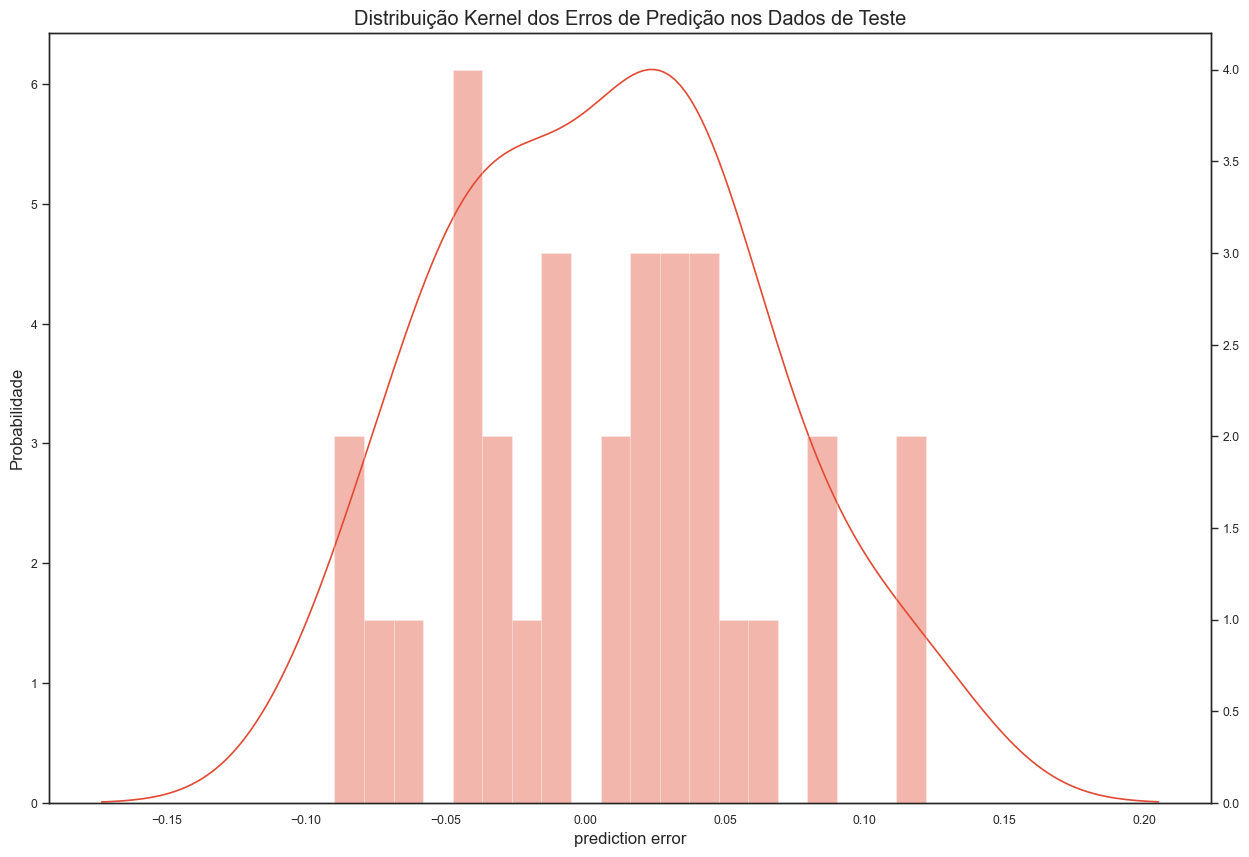

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

bins = 20

# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(dfb["prediction error"], ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(dfb["prediction error"], ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos
g1.set_ylabel("Probabilidade")
g2.set_title("Distribuição Kernel dos Erros de Predição nos Dados de Teste")

plt.show()


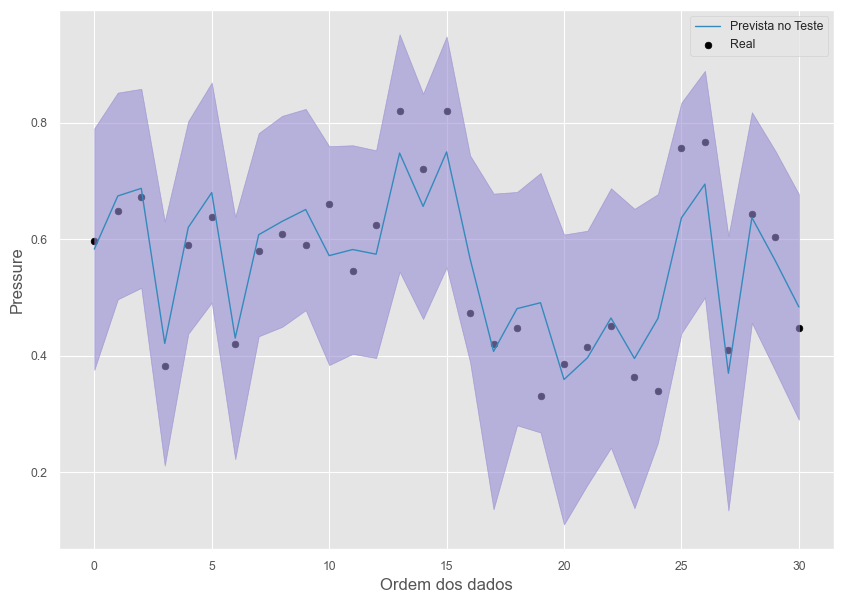

In [173]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma*2, mu-sigma * 2, alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [174]:
df_n.rename(columns={
    0: 'Frequency',1:'Angle',2:'Length',3:'Velocity',4:'Suction Side',5:'Pressure'
   
},inplace=True)

In [175]:
correlation= df_n.corr()

In [176]:
correlation

,Frequency,Angle,Length,Velocity,Suction Side,Pressure
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction Side,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Pressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [177]:
r_as=correlation['Angle']['Suction Side']

In [178]:
r_al=correlation['Angle']['Length']

<AxesSubplot:>

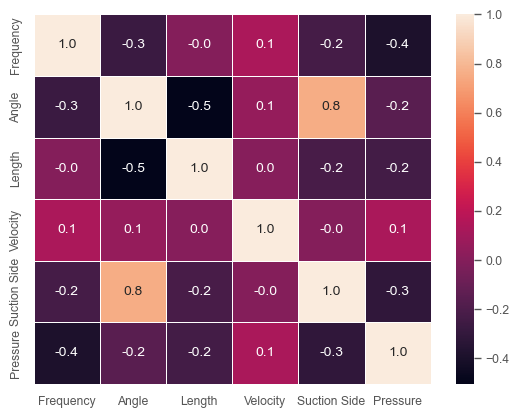

In [179]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

plot

In [180]:
#incerteza com correlação 

In [181]:
df.total['ucc']=2*((df.total['c1']*upx1)**2+
                   (df.total['c2']*upx2)**2+
                   (df.total['c3']*upx3)**2+
                   (df.total['c4']*upx4)**2+
                   (df.total['c5']*upx5)**2+
                   2*df.total['c1']*df.total['c5']*upx1*upx5*r_as+
                   2*df.total['c1']*df.total['c2']*upx1*upx2*r_al+
                   (ea/(1500**0.5))**2)**0.5+ abs(es)

In [182]:
df.total

,5,Predict,Predict Deltax1,Predict Deltax2,Predict Deltax3,Predict Deltax4,Predict Deltax5,c1,c2,c3,c4,c5,uc,prediction error,ucc,uccpercent
0,0.596591,0.582262,0.582265,0.582262,0.582263,0.582262,0.582262,3.039837,-0.536442,1.132488,0.000000,0.059605,0.085930,-0.014329,0.097185,25.001095
1,0.648363,0.695731,0.695731,0.695731,0.695731,0.695731,0.695731,-0.238419,0.119209,-0.178814,0.000000,0.178814,0.026634,0.047367,0.016311,17.061718
2,0.671870,0.690076,0.690076,0.690076,0.690076,0.690076,0.690077,0.298023,0.178814,-0.178814,-0.059605,0.476837,0.029408,0.018206,0.026585,17.302872
3,0.383147,0.415288,0.415287,0.415288,0.415288,0.415288,0.415288,-0.655651,-0.238419,-0.119209,0.119209,-0.536442,0.033568,0.032141,0.035176,29.033350
4,0.590555,0.635091,0.635090,0.635091,0.635091,0.635091,0.635091,-1.251698,-0.178814,-0.476837,0.119209,-0.834465,0.047015,0.044536,0.057282,19.726807
5,0.638046,0.703930,0.703926,0.703930,0.703930,0.703930,0.703929,-3.457069,-0.357628,-0.357628,0.119209,-1.013279,0.094367,0.065884,0.111883,21.449636
6,0.420906,0.436681,0.436681,0.436681,0.436681,0.436681,0.436681,-0.774860,-0.417233,-0.208616,0.089407,-0.566244,0.036629,0.015776,0.038488,27.828440
7,0.579068,0.601070,0.601076,0.601070,0.601070,0.601070,0.601071,5.960464,0.178814,0.059605,0.000000,0.834465,0.152600,0.022002,0.171272,32.376564
8,0.609434,0.657796,0.657792,0.657795,0.657796,0.657796,0.657796,-4.172325,-0.596046,-0.357628,0.178814,-0.298023,0.109008,0.048362,0.112174,24.482334
9,0.590342,0.676099,0.676096,0.676099,0.676099,0.676099,0.676099,-2.920628,-0.059605,-0.238419,0.119209,-0.417233,0.078177,0.085757,0.088752,20.835684


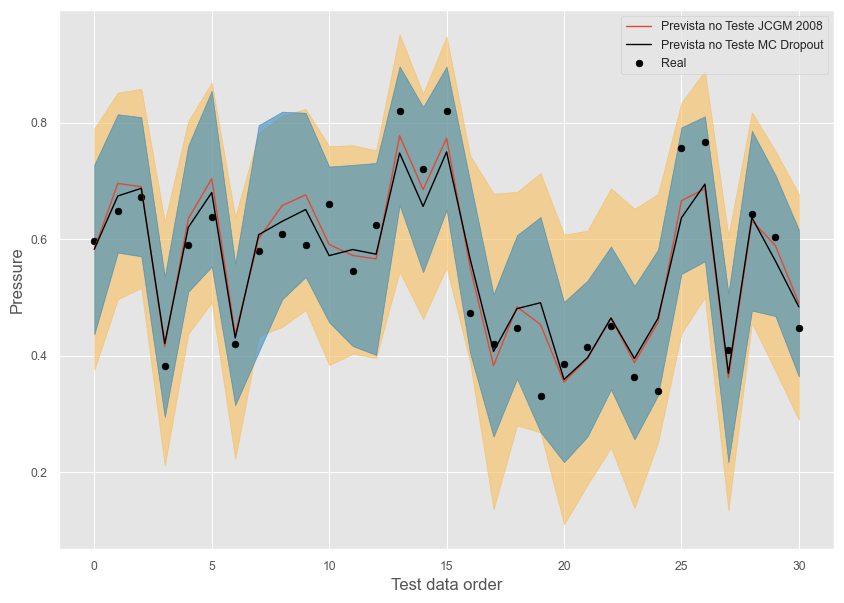

In [186]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, df.total['Predict'], label="Prevista no Teste JCGM 2008", color="C7", lw=1)
plt.plot(t, mu, label="Prevista no Teste MC Dropout", color="Black", lw=1)
for shade in range(1, 5):
    plt.fill_between(t, mu+sigma*2, mu-sigma * 2, alpha=0.2, color="C11")
for shade in range(1, 5):
    plt.fill_between(t, dfb['Predict']-dfb['ucc'], dfb['Predict']+dfb['ucc'], alpha=0.2, color="C1")

plt.scatter(t, df.total[5], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test3.png")
plt.show()

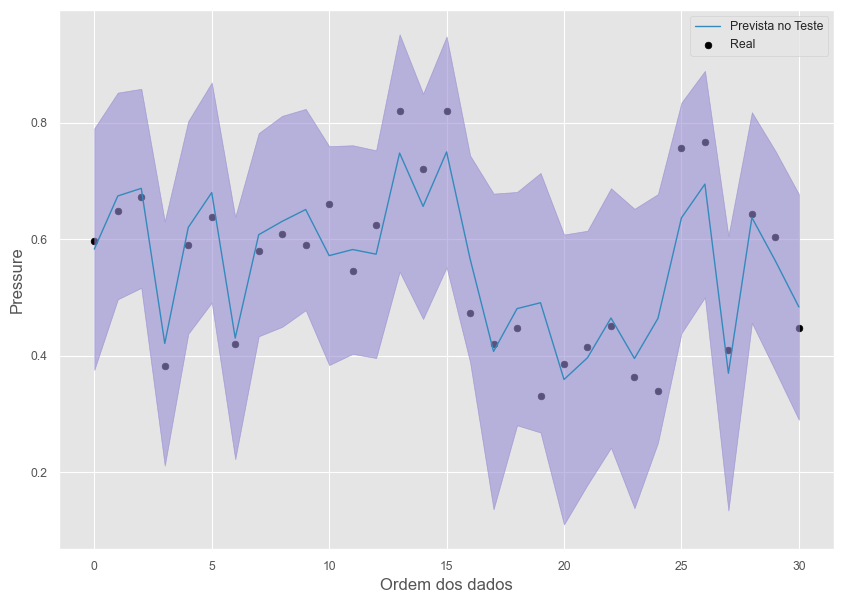

In [184]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma*2, mu-sigma * 2, alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()

In [201]:
es

0.007927197321391345

In [202]:
ea

0.05519746912175584

In [187]:
df.total.to_csv('dft.csv')

In [189]:
df.total['ucc']

0     0.097185
1     0.016311
2     0.026585
3     0.035176
4     0.057282
5     0.111883
6     0.038488
7     0.171272
8     0.112174
9     0.088752
10    0.070642
11    0.113881
12    0.129588
13    0.020844
14    0.088023
15    0.043240
16    0.101054
17    0.035593
18    0.048355
19    0.143074
20    0.085069
21    0.073897
22    0.044423
23    0.071138
24    0.050556
25    0.055680
26    0.038528
27    0.097424
28    0.114741
29    0.036118
30    0.054600
Name: ucc, dtype: float32

In [190]:
df.resume['2*std']

0     0.139206
1     0.088837
2     0.074857
3     0.142682
4     0.098654
5     0.109948
6     0.140029
7     0.082602
8     0.096000
9     0.079028
10    0.108164
11    0.092025
12    0.090535
13    0.133846
14    0.117432
15    0.125108
16    0.088686
17    0.223128
18    0.128510
19    0.161266
20    0.195723
21    0.154738
22    0.161215
23    0.205897
24    0.148135
25    0.124942
26    0.119174
27    0.178764
28    0.095341
29    0.109945
30    0.118071
Name: 2*std, dtype: float64